Enter the `correlation_id` you're interested in, and also the HUMIO Repo between `sb-demo`for DEMO and `sb-production` for PROD.

In [11]:
correlation_id = "94f79c953919b51ca145b3107df23b0c" # @param {"type":"string"}
repo = "sb-demo" # @param ["sb-demo","sb-production"]
start = "48h" # @param ["3h","12h","1d","7d","30d"]

# Graph generation

In [ ]:
from humio import query_logs
from dotenv import load_dotenv
import os

load_dotenv()
user_token = str(os.getenv("HUMIO_TOKEN"))

event_map = query_logs(
    user_token,
    repo,
    start,
    correlation_id
)
correlation_id_list = list(event_map.keys())

In [ ]:
from flowchart import Node, FlowChart, LIGHT_THEME, UNICORN_THEME, HOTDOG_THEME, VAPORWAVE_THEME, GAMEBOY_THEME, OCEANIC_THEME, MATRIX_THEME, AUTUMN_LEAVES_THEME, CYBERPUNK_THEME, RAINBOW_THEME, SOLARIZED_THEME

for correlation_id in correlation_id_list:
    FlowChart(
        correlation_id, 
        list(map(lambda x: Node(x), event_map[correlation_id])),
        theme=LIGHT_THEME,
    ).to_graphviz().unflatten().render(f'./output/{correlation_id}')

# Result

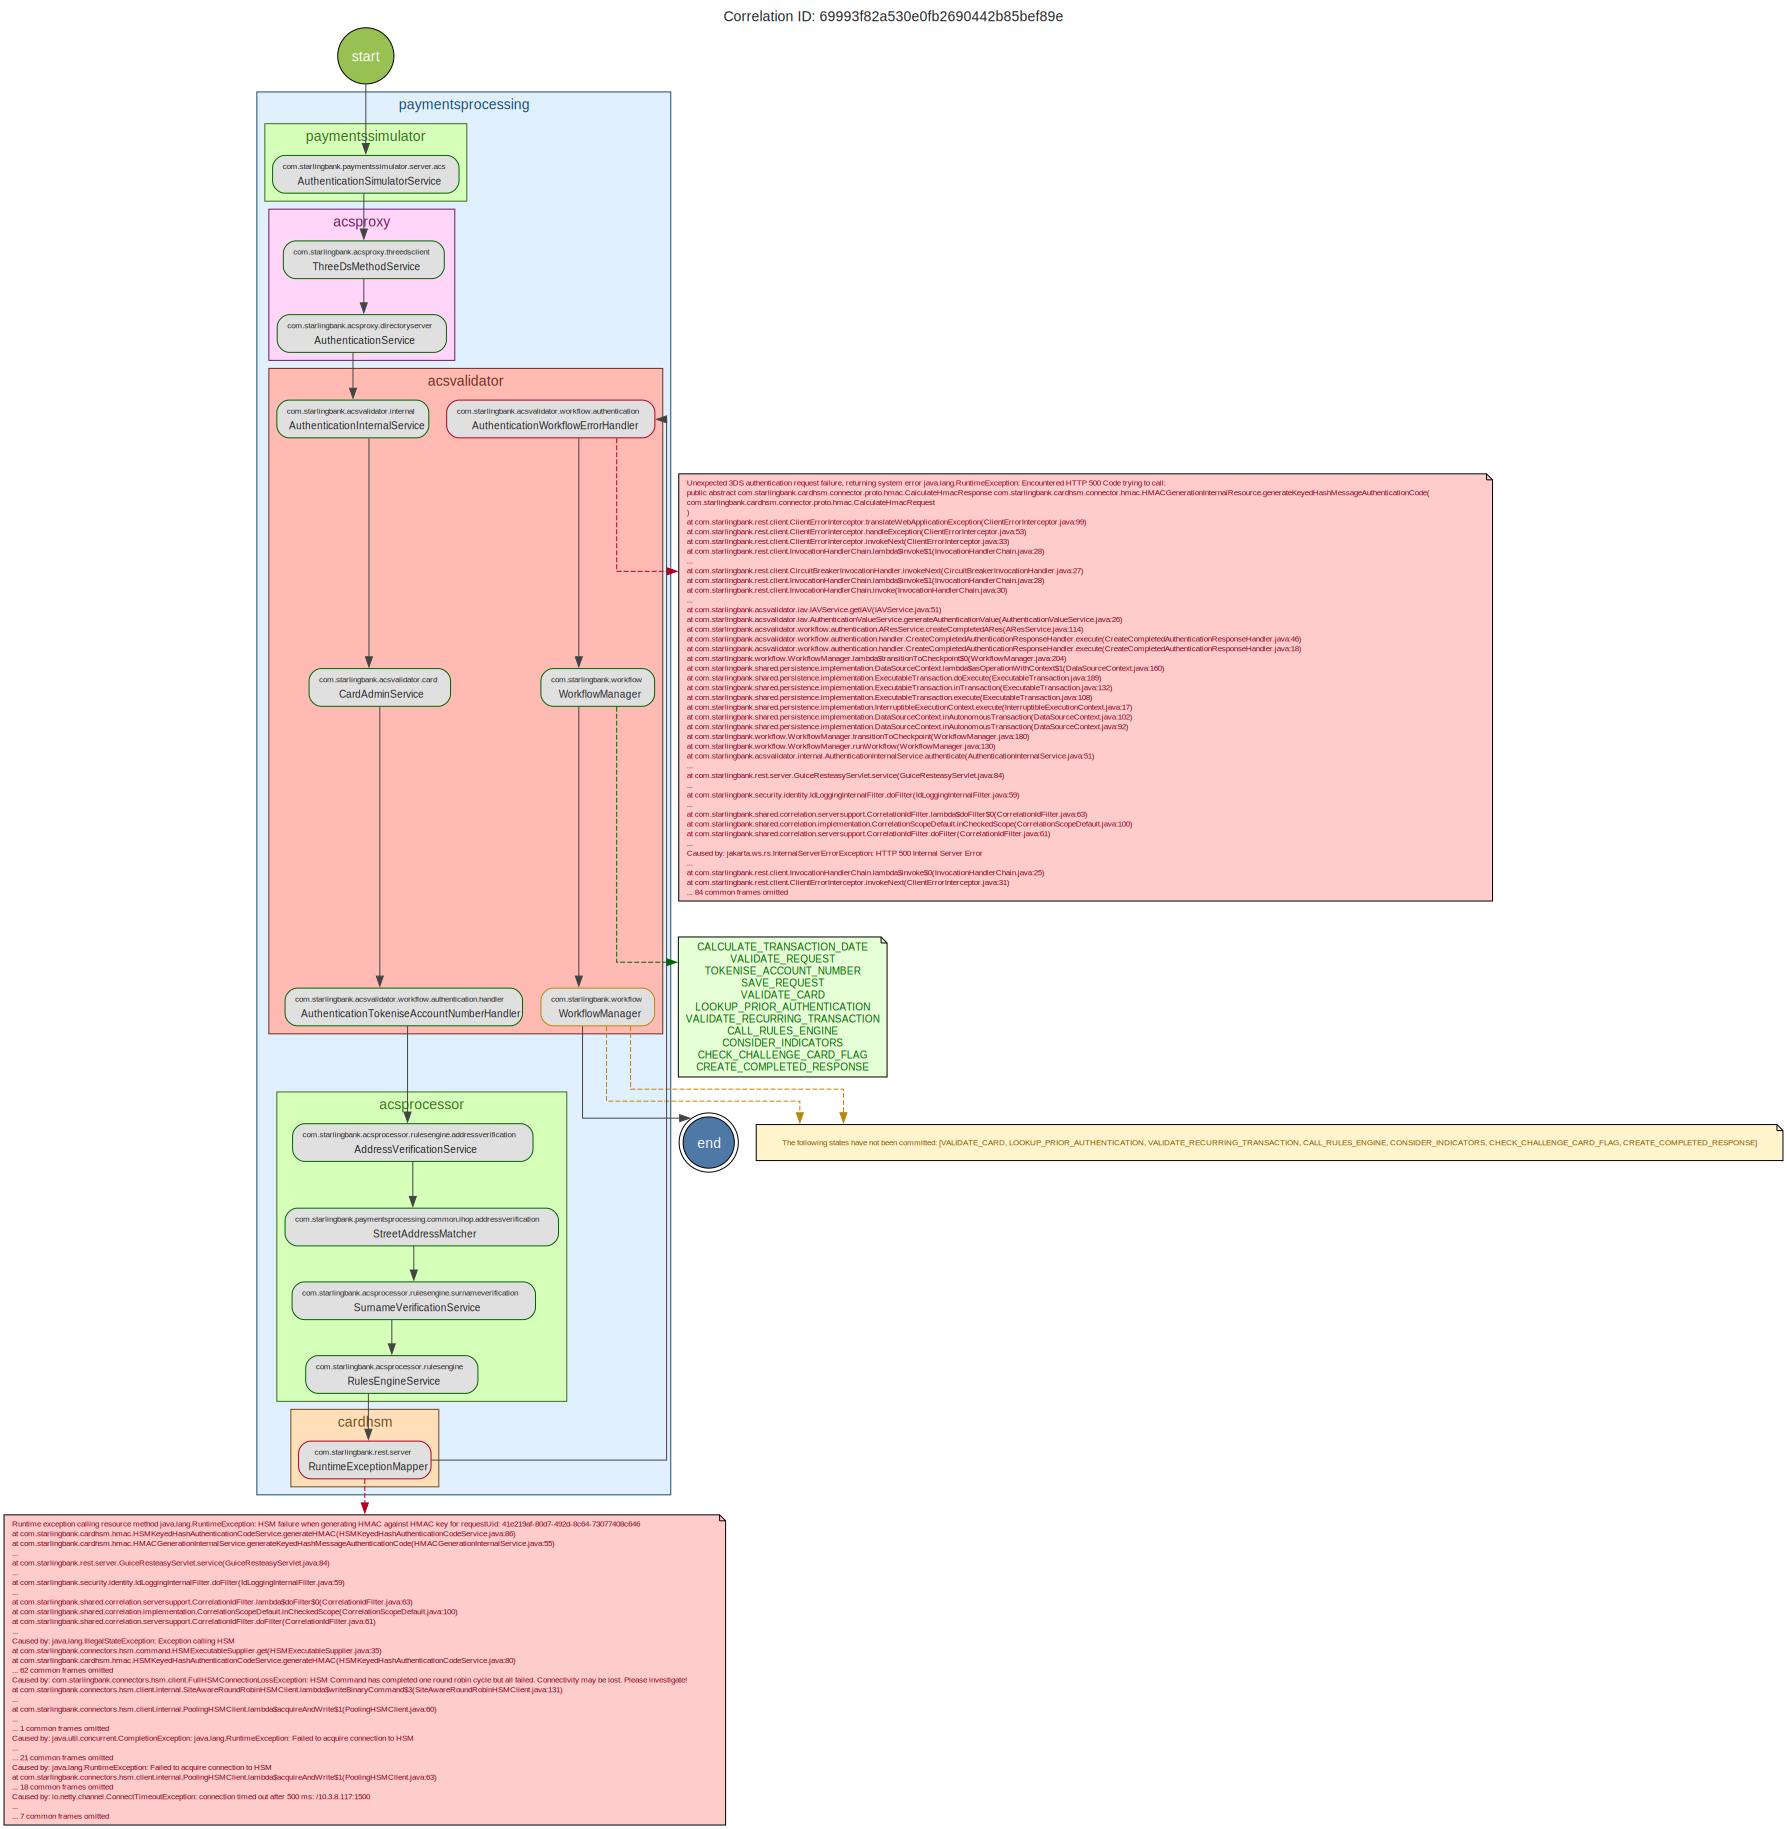

In [ ]:
from IPython.display import SVG

for correlation_id in correlation_id_list:
  display(SVG(f'./output/{correlation_id}.svg'))

# Summary generation

In [ ]:

import json

nodes = sorted(list(map(lambda x: Node(x).__dict__, events)), key=lambda x: x["timestamp"])

json_log = json.dumps(nodes, indent=2)

prompt = f"""
You are an expert system for analyzing Java application logs. 
You will receive an array of JSON log objects, chronologically ordered and potentially grouped by 'correlation_id' for related requests. 
Your task is to process these logs and generate a concise, human-readable summary of the events, focusing on identifying key actions, potential issues, and the overall flow of operations.

For each log entry, consider the 'relative_time', 'timestamp', 'level', 'className', and 'message' to understand what happened and where. 
Prefer 'relative_time' over 'timestamp' for readability when describing the sequence of events.
Pay special attention to 'level' (e.g., ERROR, WARN) and the content of 'message', including any stack traces.
If a stack trace is present, summarize the error and its context, and include the relevant snippet.

Your output should be structured breakdown of events, highlighting the sequence of actions.
If any errors are present, you must include as snapshot of the relevant stack trace.
If a stacktrace is present, include a brief summary of the error and its context.
Highlight any errors, warnings, or unusual behavior. 
If you identify a clear sequence of events related to a specific 'correlation_id', group them logically in your explanation.

DO NOT ask for any additional information or context.

Here are the JSON log objects:

```json
{json_log}
```
"""

print(prompt)


NameError: name 'events' is not defined

In [ ]:
!{sys.executable} -m pip install ollama --quiet
from ollama import generate, GenerateResponse
# codegemma:7b-instruct qwen3:14b 
# response : GenerateResponse = generate(model='qwen3:14b', prompt=prompt)

# Summary

In [ ]:
from IPython.display import Markdown

# Markdown(response.response)